In [138]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import linalg
import pfs
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [139]:
nMC = 5000          #   number of Monte Carlo runs 
nBins = 20          #   number of bins in histograms  

In [140]:
mudepth = 3000 # depth in meters
sddepth = mudepth * .1
gamma = 0.027 #Coefficient for vertical stress:depth ratio


depth = stats.norm.rvs(mudepth, sddepth, nMC)

mindepth = depth.min()
maxdepth = depth.max()
meandepth = depth.mean()
stddepth = depth.std()
rangedepth = maxdepth - mindepth

SV = np.zeros([nMC])
for i in range(nMC):
    SV[i] = stats.norm.rvs(gamma*depth[i],gamma*depth[i]*.1,1)

# muSV = 75.
# SV = stats.norm.rvs(muSV,muSV*.1,5000)


minSV = SV.min()
maxSV = SV.max()
meanSV = SV.mean()
stdSV = SV.std()
rangeSV = maxSV - minSV 


In [141]:
alpha = 1.0 #Biot's elastic coefficient
E = 51.3e2 #Young's Modulus (MPa)
v = 0.25 # Poisson Ratio (Known variable - dependent on material)
K = E/(3*(1-2*v)) # Bulk Modulus
k = 1.0 #Vertical:Horizontal stress ratio 

SH = np.zeros([nMC])
Sh = np.zeros([nMC])

for i in range(nMC):
    #k = (7*E/1000)*(1/depth[i] + 0.0001) + 0.25
    Sh[i] = stats.norm.rvs(k*SV[i]*.7,k*SV[i]*.7*.1,1)
    SH[i] = stats.norm.rvs(k*SV[i]*1.3,k*SV[i]*1.3*.1,1)


# muSh = 35.
# muSH = 55.
# SH = stats.norm.rvs(muSH,muSH*.1,5000)
# Sh = stats.norm.rvs(muSh,muSh*.1,5000)

minSH = SH.min()
maxSH = SH.max()
meanSH = SH.mean()
stdSH = SH.std()
rangeSH = maxSH - minSH 
muSH = SH.mean()

minSh = Sh.min()
maxSh = Sh.max()
meanSh = Sh.mean()
stdSh = Sh.std()
rangeSh = maxSh - minSh 
muSh = Sh.mean()

In [142]:
#pore fluid pressure; can assume hydrostatic in many cases (= 0.4 * sV)
Pf = np.zeros([nMC])
for i in range(nMC):
    Pf[i] = stats.norm.rvs(0.4*SV[i], 0.4*SV[i]*.1, 1)

# muPf = 30.
# Pf = stats.norm.rvs(muPf, muPf*.1, nMC)



muPf = Pf.mean()
sdPf = Pf.std()

minPf = Pf.min()
maxPf = Pf.max()
meanPf = Pf.mean()
stdPf = Pf.std()
rangePf = maxPf - minPf 

In [143]:
#   SHmax azimuth
#   von Mises circular normal distribution 
SHazMean = 60.
SHazKappa = 200. 
#   von Mises symmetrical about mean, in range -pi to +pi
SHaz = pfs.rad2deg(np.random.vonmises(pfs.deg2rad(SHazMean), SHazKappa, nMC))
minSHaz, maxSHaz, meanSHaz, medianSHaz = pfs.getCircStats(SHaz) 
rangeSHaz = maxSHaz - np.abs(minSHaz) 
SHazTrue = SHaz
SHaz[np.ix_(SHaz<0)] += 180.
SHaz[np.ix_(SHaz>180)] -= 180.

In [144]:
#   fault strike, degrees 
#   von Mises circular normal distribution 
muStrike = 60.
kappaStrike = 200. 

#   fault dip, degrees 
#   von Mises circular normal distribution 
muDip = 60.
kappaDip = 200. 

#   rationalise the fault plane distribution to conform to right-hand rule 
#   strike < 180, dip component to South (dip always <= 90) 
#   strike > 180, dip component to North (dip always <= 90) 
Strike, StrikeTrue, Dip = pfs.setFaultDist(nMC, muStrike, kappaStrike, muDip, kappaDip)

minStrike, maxStrike, meanStrike, medianStrike = pfs.getCircStats(StrikeTrue) 
rangeStrike = StrikeTrue.max() - StrikeTrue.min() 

minDip, maxDip, meanDip, medianDip = pfs.getCircStats(Dip) 
rangeDip = maxDip - minDip 

In [145]:
#   rock properties - friction and cohesion 

muMu = 0.85
stdMu = muMu * .1 
a = -3. 
Mu = stats.skewnorm.rvs(a, muMu, stdMu, nMC)
minMu = Mu.min()
maxMu = Mu.max()
rangeMu = maxMu - minMu 
meanMu = Mu.mean()
stdMu = Mu.std()

muC0 = 20. 
sdC0 = muC0 * .1
a = +3. 
C0 = stats.skewnorm.rvs(a, muC0, sdC0, nMC)
minC0 = C0.min()
maxC0 = C0.max()
rangeC0 = maxC0 - minC0 
meanC0 = C0.mean()
stdC0 = C0.std() 

In [146]:

beta = 8.8e-5 #thermal expansion coefficient

mudeltaT = -70
sddeltaT = abs(mudeltaT*.05)

deltaT = stats.norm.rvs(mudeltaT, sddeltaT, nMC)

mindeltaT = deltaT.min()
maxdeltaT = deltaT.max()
meandeltaT = deltaT.mean()
stddeltaT = deltaT.std()
rangedeltaT = maxdeltaT - mindeltaT 

minSV = SV.min()
maxSV = SV.max()
meanSV = SV.mean()
stdSV = SV.std()
rangeSV = maxSV - minSV 

minSH = SH.min()
maxSH = SH.max()
meanSH = SH.mean()
stdSH = SH.std()
rangeSH = maxSH - minSH 

minSh = Sh.min()
maxSh = Sh.max()
meanSh = Sh.mean()
stdSh = Sh.std()
rangeSh = maxSh - minSh 

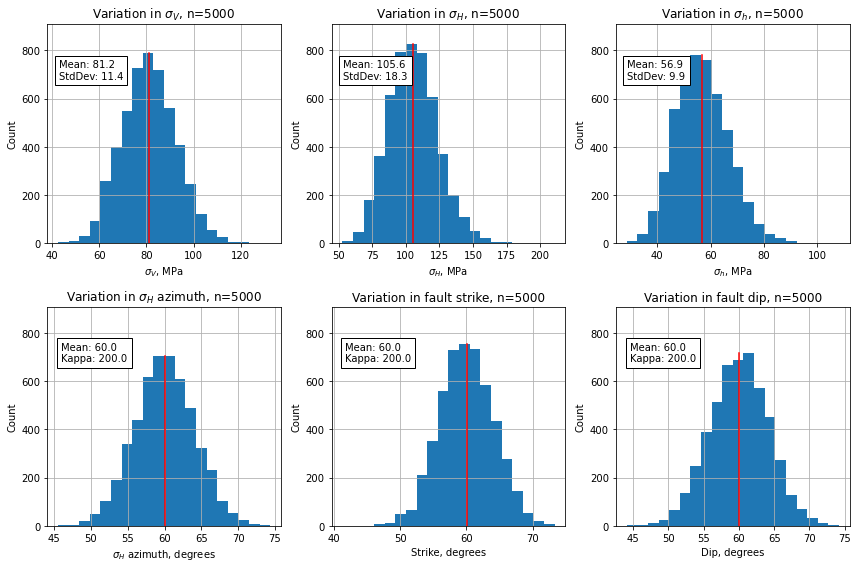

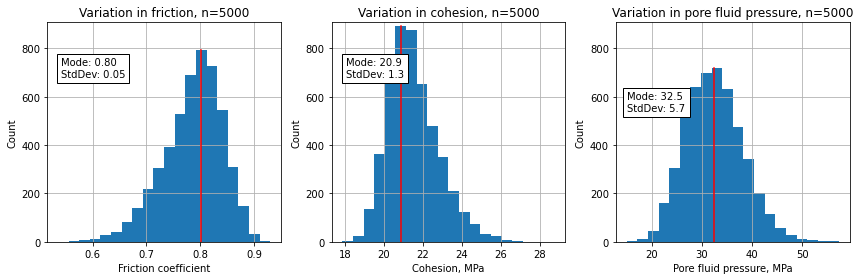

In [147]:
fig, axs = plt.subplots(2, 3, figsize=(12,8))

nSV, bSV, pSV = axs[0,0].hist(SV, nBins)
nSH, bSH, pSH = axs[0,1].hist(SH, nBins)
nSh, bSh, pSh = axs[0,2].hist(Sh, nBins)
nSHaz, bSHaz, pSHaz = axs[1,0].hist(SHaz, nBins)
nStrike, bStrike, pStrike = axs[1,1].hist(Strike, nBins)
nDip, bDip, pDip = axs[1,2].hist(Dip, nBins)

nMax = np.max([nSh.max(), nSH.max(), nSV.max(), nSHaz.max(), nStrike.max(), nDip.max()])*1.1 

axs[0,0].plot([meanSV, meanSV], [0, np.max(nSV)], '-r')
axs[0,0].text(SV.min()*1.01, nMax*.75, 
              ('Mean: %3.1f\nStdDev: %2.1f' % (meanSV, stdSV)), 
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[0,0].set_ylim(0., nMax)
axs[0,0].set_xlabel(r'$\sigma_V$, MPa')
axs[0,0].set_ylabel('Count')
axs[0,0].grid(True)
axs[0,0].set_title(r'Variation in $\sigma_V$, n=%i' % nMC)

axs[0,1].plot([meanSH, meanSH], [0, np.max(nSH)], '-r')
axs[0,1].text(SH.min()*1.01, nMax*.75, 
              ('Mean: %3.1f\nStdDev: %2.1f' % (meanSH, stdSH)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[0,1].set_ylim(0., nMax)
axs[0,1].set_xlabel(r'$\sigma_H$, MPa')
axs[0,1].set_ylabel('Count')
axs[0,1].grid(True)
axs[0,1].set_title(r'Variation in $\sigma_H$, n=%i' % nMC)

axs[0,2].plot([muSh, muSh], [0, np.max(nSh)], '-r')
axs[0,2].text(Sh.min()*1.01, nMax*.75, 
              ('Mean: %3.1f\nStdDev: %2.1f' % (meanSh, stdSh)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[0,2].set_ylim(0., nMax)
axs[0,2].set_xlabel(r'$\sigma_h$, MPa')
axs[0,2].set_ylabel('Count')
axs[0,2].grid(True)
axs[0,2].set_title(r'Variation in $\sigma_h$, n=%i' % nMC)

axs[1,0].plot([meanSHaz, meanSHaz], [0, np.max(nSHaz)], '-r')
axs[1,0].text(minSHaz*1.01, nMax*.75, 
              ('Mean: %3.1f\nKappa: %3.1f' % (meanSHaz, SHazKappa)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[1,0].set_ylim(0., nMax)
axs[1,0].set_xlabel(r'$\sigma_H$ azimuth, degrees')
axs[1,0].set_ylabel('Count')
#axs[1,0].set_xlim(0., 180.)
axs[1,0].grid(True)
axs[1,0].set_title(r'Variation in $\sigma_H$ azimuth, n=%i' % nMC)

axs[1,1].plot([meanStrike, meanStrike], [0, np.max(nStrike)], '-r')
axs[1,1].text(minStrike*1.01, nMax*.75, 
              ('Mean: %3.1f\nKappa: %3.1f' % (muStrike, kappaStrike)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[1,1].set_ylim(0., nMax)
axs[1,1].set_xlabel('Strike, degrees')
axs[1,1].set_ylabel('Count')
#axs[1,1].set_xlim(0., 360.)
axs[1,1].grid(True)
axs[1,1].set_title('Variation in fault strike, n=%i' % nMC)

axs[1,2].plot([meanDip, meanDip], [0, np.max(nDip)], '-r')
axs[1,2].text(minDip*1.01, nMax*.75, 
              ('Mean: %3.1f\nKappa: %3.1f' % (muDip, kappaDip)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[1,2].set_ylim(0., nMax)
axs[1,2].set_xlabel('Dip, degrees')
axs[1,2].set_ylabel('Count')
#axs[1,2].set_xlim(0., 90.)
axs[1,2].grid(True)
axs[1,2].set_title('Variation in fault dip, n=%i' % nMC)

plt.tight_layout() 
plt.savefig('WorkedExample2_input_hist1.png', dpi=300)

fig, axs = plt.subplots(1, 3, figsize=(12,4))

nMu, bMu, pMu = axs[0].hist(Mu, nBins)
nC0, bC0, pC0 = axs[1].hist(C0, nBins)
nPf, bPf, pPf = axs[2].hist(Pf, nBins)

#   get mode of mu and C0 as better measures of distrib 
modeMu = bMu[np.ix_(nMu == nMu.max())] + (bMu[1]-bMu[0])/2.
modeC0 = bC0[np.ix_(nC0 == nC0.max())] + (bC0[1]-bC0[0])/2.

axs[0].plot([modeMu, modeMu], [0, np.max(nMu)], '-r')
axs[0].text(minMu*1.01, nMax*.75, 
              ('Mode: %3.2f\nStdDev: %3.2f' % (modeMu, stdMu)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[0].set_ylim(0., nMax)
axs[0].set_xlabel('Friction coefficient')
axs[0].set_ylabel('Count')
axs[0].grid(True)
axs[0].set_title('Variation in friction, n=%i' % nMC)

axs[1].plot([modeC0, modeC0], [0, np.max(nC0)], '-r')
axs[1].text(minC0*1.01, nMax*.75, 
              ('Mode: %3.1f\nStdDev: %3.1f' % (modeC0, stdC0)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[1].set_ylim(0., nMax)
axs[1].set_xlabel('Cohesion, MPa')
axs[1].set_ylabel('Count')
axs[1].grid(True)
axs[1].set_title('Variation in cohesion, n=%i' % nMC)

axs[2].plot([muPf, muPf], [0, np.max(nPf)], '-r')
axs[2].text(minPf*1.01, nPf.max()*.75, 
              ('Mode: %3.1f\nStdDev: %3.1f' % (muPf, stdPf)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[2].set_ylim(0., nMax)
axs[2].set_xlabel('Pore fluid pressure, MPa')
axs[2].set_ylabel('Count')
axs[2].grid(True)
axs[2].set_title('Variation in pore fluid pressure, n=%i' % nMC)

plt.tight_layout() 
plt.savefig('WorkedExample2_input_hist2.png', dpi=300)

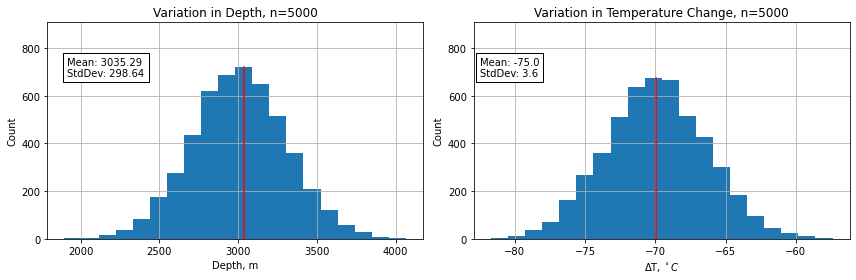

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

ndepth, bdepth, pdepth = axs[0].hist(depth, nBins)
ndeltaT, bdeltaT, pdeltaT = axs[1].hist(deltaT, nBins)

#   get mode of depth and deltaT as better measures of distrib 
modedepth = bdepth[np.ix_(ndepth == ndepth.max())] + (bdepth[1]-bdepth[0])/2.
modedeltaT = bdeltaT[np.ix_(nC0 == nC0.max())] + (bdeltaT[1]-bdeltaT[0])/2.

axs[0].plot([modedepth, modedepth], [0, np.max(ndepth)], '-r')
axs[0].text(mindepth*1.01, nMax*.75, 
              ('Mean: %3.2f\nStdDev: %3.2f' % (modedepth, stddepth)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[0].set_ylim(0., nMax)
axs[0].set_xlabel('Depth, m')
axs[0].set_ylabel('Count')
axs[0].grid(True)
axs[0].set_title('Variation in Depth, n=%i' % nMC)

axs[1].plot([meandeltaT, meandeltaT], [0, np.max(ndeltaT)], '-r')
axs[1].text(mindeltaT*1.01, nMax*.75, 
              ('Mean: %3.1f\nStdDev: %3.1f' % (modedeltaT, stddeltaT)),
                           bbox=dict(facecolor='white', edgecolor='black'))
axs[1].set_ylim(0., nMax)
axs[1].set_xlabel(r'$\Delta$T, $ ^\circ C $')
axs[1].set_ylabel('Count')
axs[1].grid(True)
axs[1].set_title('Variation in Temperature Change, n=%i' % nMC)



plt.tight_layout() 


In [149]:
#   Mohr plot showing variations in stresses 
#pfs.plotMohr4(SH, SV, Sh, Pf, Mu, modeMu, C0, modeC0)

In [150]:
q = 11                  #   9 variables, linear terms only 
q2 = 0.5 * q * (q + 1) + q  #   total terms incl. squares and products 

nSf = pow(3,q)         #   3 coordinates for each variable 

Xl = np.zeros([nSf,q+1])
Xq = np.zeros([int(nSf), int(q2)+1])

#    first, build the linear terms... 
iRow = 0 
for iA in range(-1,+2):
    for iB in range(-1,+2):
        for iC in range(-1,+2):
            for iD in range(-1,+2):
                for iE in range(-1,+2):
                    for iF in range(-1,+2):
                        for iG in range(-1,+2):
                            for iH in range(-1,+2):
                                for iJ in range(-1,+2):
                                    for iK in range(-1, +2):
                                        for iL in range(-1, +2):
                                            Xl[iRow, :] = [1, iA, iB, iC, iD, iE, iF, iG, iH, iJ, iK, iL]
                                            iRow += 1

#   get y values for Sf 
ySf = np.zeros([nSf,])
yTd = np.zeros([nSf,])
for i in range(0,nSf):
    ySV = Xl[i,1] * rangeSV / 2. + meanSV 
    ySH = Xl[i,2] * rangeSH / 2. + meanSH 
    ySh = Xl[i,3] * rangeSh / 2. + meanSh 
    yPf = Xl[i,4] * rangePf / 2. + meanPf
    ySHaz = Xl[i,5] * rangeSHaz / 2. + meanSHaz 
    if ySHaz < 0.:
        ySHaz += 180.
    yStrike = Xl[i,6] * rangeStrike / 2. + meanStrike 
    if yStrike < 0.:
        yStrike += 360.
    yDip = Xl[i,7] * rangeDip / 2. + meanDip 
    yMu = Xl[i,8] * rangeMu / 2. + meanMu 
    yC0 = Xl[i,9] * rangeC0 / 2. + meanC0 
    yT = Xl[i,10] * rangedeltaT/ 2. + meandeltaT
    ydepth = Xl[i,11] * rangedepth/ 2. + meandepth
    ysigmaN, ytau = pfs.calcAndersonianStressOnPlane(ySV, ySH, ySh, ySHaz, yStrike, yDip)
    ySf[i] = (ysigmaN - yPf + K*beta*yT) - (ytau - yC0)/yMu


#   and then the quadratic terms, using the linear terms from above 
for iQ in range(0,nSf):
    #   linear terms 
    Xq[iQ,1] = Xl[iQ,1]
    Xq[iQ,2] = Xl[iQ,2]
    Xq[iQ,3] = Xl[iQ,3]
    Xq[iQ,4] = Xl[iQ,4]
    Xq[iQ,5] = Xl[iQ,5]
    Xq[iQ,6] = Xl[iQ,6]
    Xq[iQ,7] = Xl[iQ,7]
    Xq[iQ,8] = Xl[iQ,8]
    Xq[iQ,9] = Xl[iQ,9]
    Xq[iQ,10] = Xl[iQ,10]
    Xq[iQ,11] = Xl[iQ,11]
    #   cross products 
    Xq[iQ,12] = Xl[iQ,1]*Xl[iQ,2]
    Xq[iQ,13] = Xl[iQ,1]*Xl[iQ,3]
    Xq[iQ,14] = Xl[iQ,1]*Xl[iQ,4]
    Xq[iQ,15] = Xl[iQ,1]*Xl[iQ,5]
    Xq[iQ,16] = Xl[iQ,1]*Xl[iQ,6]
    Xq[iQ,17] = Xl[iQ,1]*Xl[iQ,7]
    Xq[iQ,18] = Xl[iQ,1]*Xl[iQ,8]
    Xq[iQ,19] = Xl[iQ,1]*Xl[iQ,9]
    Xq[iQ,20] = Xl[iQ,1]*Xl[iQ,10]
    Xq[iQ,21] = Xl[iQ,1]*Xl[iQ,11]
    
    Xq[iQ,22] = Xl[iQ,2]*Xl[iQ,3]
    Xq[iQ,23] = Xl[iQ,2]*Xl[iQ,4]
    Xq[iQ,24] = Xl[iQ,2]*Xl[iQ,5]
    Xq[iQ,25] = Xl[iQ,2]*Xl[iQ,6]
    Xq[iQ,26] = Xl[iQ,2]*Xl[iQ,7]
    Xq[iQ,27] = Xl[iQ,2]*Xl[iQ,8]
    Xq[iQ,28] = Xl[iQ,2]*Xl[iQ,9]
    Xq[iQ,29] = Xl[iQ,2]*Xl[iQ,10]
    Xq[iQ,30] = Xl[iQ,2]*Xl[iQ,11]
    
    Xq[iQ,31] = Xl[iQ,3]*Xl[iQ,4]
    Xq[iQ,32] = Xl[iQ,3]*Xl[iQ,5]
    Xq[iQ,33] = Xl[iQ,3]*Xl[iQ,6]
    Xq[iQ,34] = Xl[iQ,3]*Xl[iQ,7]
    Xq[iQ,35] = Xl[iQ,3]*Xl[iQ,8]
    Xq[iQ,36] = Xl[iQ,3]*Xl[iQ,9]
    Xq[iQ,37] = Xl[iQ,3]*Xl[iQ,10]
    Xq[iQ,38] = Xl[iQ,3]*Xl[iQ,11]
    
    Xq[iQ,39] = Xl[iQ,4]*Xl[iQ,5]
    Xq[iQ,40] = Xl[iQ,4]*Xl[iQ,6]
    Xq[iQ,41] = Xl[iQ,4]*Xl[iQ,7]
    Xq[iQ,42] = Xl[iQ,4]*Xl[iQ,8]
    Xq[iQ,43] = Xl[iQ,4]*Xl[iQ,8]
    Xq[iQ,44] = Xl[iQ,4]*Xl[iQ,10]
    Xq[iQ,45] = Xl[iQ,4]*Xl[iQ,11]
    
    Xq[iQ,46] = Xl[iQ,5]*Xl[iQ,6]
    Xq[iQ,47] = Xl[iQ,5]*Xl[iQ,7]
    Xq[iQ,48] = Xl[iQ,5]*Xl[iQ,8]
    Xq[iQ,49] = Xl[iQ,5]*Xl[iQ,9]
    Xq[iQ,50] = Xl[iQ,5]*Xl[iQ,10]
    Xq[iQ,51] = Xl[iQ,5]*Xl[iQ,11]
    
    Xq[iQ,52] = Xl[iQ,6]*Xl[iQ,7]
    Xq[iQ,53] = Xl[iQ,6]*Xl[iQ,8]
    Xq[iQ,54] = Xl[iQ,6]*Xl[iQ,9]
    Xq[iQ,55] = Xl[iQ,6]*Xl[iQ,10]
    Xq[iQ,56] = Xl[iQ,1]*Xl[iQ,11]
    
    Xq[iQ,57] = Xl[iQ,7]*Xl[iQ,8]
    Xq[iQ,58] = Xl[iQ,7]*Xl[iQ,9]
    Xq[iQ,59] = Xl[iQ,7]*Xl[iQ,10]
    Xq[iQ,60] = Xl[iQ,7]*Xl[iQ,11]

    Xq[iQ,61] = Xl[iQ,8]*Xl[iQ,9]
    Xq[iQ,62] = Xl[iQ,8]*Xl[iQ,10]
    Xq[iQ,63] = Xl[iQ,8]*Xl[iQ,11]

    Xq[iQ,64] = Xl[iQ,9]*Xl[iQ,10]
    Xq[iQ,65] = Xl[iQ,9]*Xl[iQ,11]

    Xq[iQ,66] = Xl[iQ,10]*Xl[iQ,11]
    
    #   squares 
    Xq[iQ,67] = Xl[iQ,1]*Xl[iQ,1]
    Xq[iQ,68] = Xl[iQ,2]*Xl[iQ,2]
    Xq[iQ,69] = Xl[iQ,3]*Xl[iQ,3]
    Xq[iQ,70] = Xl[iQ,4]*Xl[iQ,4]
    Xq[iQ,71] = Xl[iQ,5]*Xl[iQ,5]
    Xq[iQ,72] = Xl[iQ,6]*Xl[iQ,6]
    Xq[iQ,73] = Xl[iQ,7]*Xl[iQ,7]
    Xq[iQ,74] = Xl[iQ,8]*Xl[iQ,8]
    Xq[iQ,75] = Xl[iQ,9]*Xl[iQ,9]
    Xq[iQ,76] = Xl[iQ,10]*Xl[iQ,10]
    Xq[iQ,77] = Xl[iQ,11]*Xl[iQ,11]

Xq[:,0] = 1 
Xq2 = np.dot(Xq.T, Xq)  

#   get y values for quadratic terms... 
ySfq = np.zeros([int(q2)+1,])
for i in range(0, int(q2)+1):
    for j in range(0, nSf):
        ySfq[i] = ySfq[i] + Xq[j,i] * ySf[j] 
ySfq[0] = sum(ySf)

In [151]:
model = Ridge(alpha = 1.0)

model.fit(Xq2,ySfq)

BetaSf = model.coef_

In [152]:
#   solve for beta using least squares 
#BetaSf, res, rank, s = linalg.lstsq(Xq2, ySfq)

In [153]:
#   Monte Carlo simulation using quadratic response surface 
mcSfq = np.zeros([nMC,])
xSV = (SV - meanSV) / (rangeSV / 2.)  
xSH = (SH - meanSH) / (rangeSH / 2.)  
xSh = (Sh - meanSh) / (rangeSh / 2.)  
xPf = (Pf - meanPf) / (rangePf / 2.)  
xSHaz = (SHazTrue - meanSHaz) / (rangeSHaz / 2.)  
xStrike = (StrikeTrue - meanStrike) / (rangeStrike / 2.)  
xDip = (Dip - meanDip) / (rangeDip / 2.)  
xMu = (Mu - meanMu) / (rangeMu / 2.)  
xC0 = (C0 - meanC0) / (rangeC0 / 2.)
xdeltaT = (deltaT - meandeltaT)/(rangedeltaT/2.)  
xdepth = (depth - meandepth)/(rangedepth/2.)

for i in range(0, nMC):
    mcSfq[i] = (BetaSf[0] + 
            BetaSf[1] * xSV[i] +
            BetaSf[2] * xSH[i] +
            BetaSf[3] * xSh[i] +
            BetaSf[4] * xPf[i] +
            BetaSf[5] * xSHaz[i] +
            BetaSf[6] * xStrike[i] +
            BetaSf[7] * xDip[i] +
            BetaSf[8] * xMu[i] +
            BetaSf[9] * xC0[i] +
            BetaSf[10] * xdeltaT[i] +
            BetaSf[11] * xdepth[i] +
            
            BetaSf[12] * xSV[i] * xSH[i] + 
            BetaSf[13] * xSV[i] * xSh[i] + 
            BetaSf[14] * xSV[i] * xPf[i] + 
            BetaSf[15] * xSV[i] * xSHaz[i] + 
            BetaSf[16] * xSV[i] * xStrike[i] + 
            BetaSf[17] * xSV[i] * xDip[i] + 
            BetaSf[18] * xSV[i] * xMu[i] + 
            BetaSf[19] * xSV[i] * xC0[i] + 
            BetaSf[20] * xSV[i] * xdeltaT[i] +
            BetaSf[21] * xSV[i] * xdepth[i] +

            BetaSf[22] * xSH[i] * xSh[i] + 
            BetaSf[23] * xSH[i] * xPf[i] + 
            BetaSf[24] * xSH[i] * xSHaz[i] + 
            BetaSf[25] * xSH[i] * xStrike[i] + 
            BetaSf[26] * xSH[i] * xDip[i] + 
            BetaSf[27] * xSH[i] * xMu[i] + 
            BetaSf[28] * xSH[i] * xC0[i] + 
            BetaSf[29] * xSH[i] * xdeltaT[i] +
            BetaSf[30] * xSH[i] * xdepth[i] +

            BetaSf[31] * xSh[i] * xPf[i] + 
            BetaSf[32] * xSh[i] * xSHaz[i] + 
            BetaSf[33] * xSh[i] * xStrike[i] + 
            BetaSf[34] * xSh[i] * xDip[i] + 
            BetaSf[35] * xSh[i] * xMu[i] + 
            BetaSf[36] * xSh[i] * xC0[i] + 
            BetaSf[37] * xSh[i] * xdeltaT[i] + 
            BetaSf[38] * xSh[i] * xdepth[i] + 
            
            BetaSf[39] * xPf[i] * xSHaz[i] + 
            BetaSf[40] * xPf[i] * xStrike[i] + 
            BetaSf[41] * xPf[i] * xDip[i] + 
            BetaSf[42] * xPf[i] * xMu[i] + 
            BetaSf[43] * xPf[i] * xC0[i] + 
            BetaSf[44] * xPf[i] * xdeltaT[i] +
            BetaSf[45] * xPf[i] * xdepth[i] +

            BetaSf[46] * xSHaz[i] * xStrike[i] + 
            BetaSf[47] * xSHaz[i] * xDip[i] + 
            BetaSf[48] * xSHaz[i] * xMu[i] + 
            BetaSf[49] * xSHaz[i] * xC0[i] + 
            BetaSf[50] * xSHaz[i] * xdeltaT[i] + 
            BetaSf[51] * xSHaz[i] * xdepth[i] +
            
            BetaSf[52] * xStrike[i] * xDip[i] + 
            BetaSf[53] * xStrike[i] * xMu[i] + 
            BetaSf[54] * xStrike[i] * xC0[i] + 
            BetaSf[55] * xStrike[i] * xdeltaT[i] +
            BetaSf[56] * xStrike[i] * xdepth[i] +
        
            BetaSf[57] * xDip[i] * xMu[i] + 
            BetaSf[58] * xDip[i] * xC0[i] + 
            BetaSf[59] * xDip[i] * xdeltaT[i] +
            BetaSf[60] * xDip[i] * xdepth[i] +
            
            BetaSf[61] * xMu[i] * xC0[i] + 
            BetaSf[62] * xMu[i] * xdeltaT[i] +
            BetaSf[63] * xMu[i] * xdepth[i] +
            
            BetaSf[64] * xC0[i] * xdeltaT[i] +
            BetaSf[65] * xC0[i] * xdepth[i] +

            BetaSf[66] * xdeltaT[i] * xdepth[i] +

            BetaSf[67] * xSV[i] * xSV[i] + 
            BetaSf[68] * xSH[i] * xSH[i] + 
            BetaSf[69] * xSh[i] * xSh[i] + 
            BetaSf[70] * xPf[i] * xPf[i] + 
            BetaSf[71] * xSHaz[i] * xSHaz[i] + 
            BetaSf[72] * xStrike[i] * xStrike[i] + 
            BetaSf[73] * xDip[i] * xDip[i] +
            BetaSf[74] * xMu[i] * xMu[i] +
            BetaSf[75] * xC0[i] * xC0[i] +
            BetaSf[76] * xdeltaT[i] * xdeltaT[i] +
            BetaSf[77] * xdepth[i] * xdepth[i])

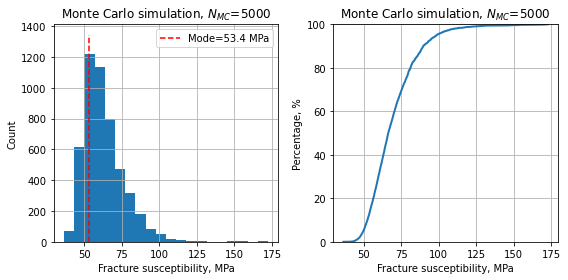

In [154]:
#   plot MC results    
fig, ax = plt.subplots(figsize=(8,4))

#   histogram
ax = plt.subplot(121)
n, b, p = ax.hist(mcSfq.T, nBins)
sortedb = b[n.argsort()]
incb = b[1] - b[0]
mcSfqMode = sortedb[-1] + incb/2. 
ax.plot([mcSfqMode, mcSfqMode], [0, np.max(n)*1.1], 
            '--r', label='Mode=%3.1f MPa' % mcSfqMode)
ax.grid(True)
ax.set_xlabel('Fracture susceptibility, MPa')
ax.set_ylabel('Count')
ax.legend()
ax.set_title(r'Monte Carlo simulation, $N_{MC}$=%i' % nMC)
        
#   CDF plot
ax = plt.subplot(122)
sortSf = np.sort(mcSfq)
#    cumSf = (np.cumsum(sortSf) / np.sum(sortSf)) * 100.
sortSfadj = sortSf - sortSf.min()
cumSf = (np.cumsum(sortSfadj) / np.sum(sortSfadj)) * 100.

ax.plot(sortSf, cumSf, linewidth=2)         
ax.grid(True)
ax.set_ylim(0., 100.) 
ax.set_xlabel('Fracture susceptibility, MPa')
ax.set_ylabel('Percentage, %')
ax.set_title(r'Monte Carlo simulation, $N_{MC}$=%i' % nMC)

plt.tight_layout()     
plt.savefig('WorkedExample2_quadratic_MChistCDF.png', dpi=300)

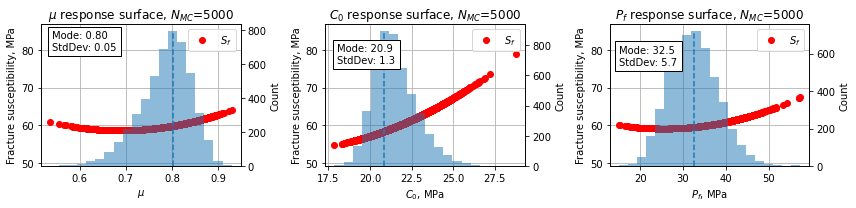

In [155]:
#   plot input distribution histograms with response surfaces 
#   overlain calculated for mean values of all other params 
sVSfq = np.zeros([nMC,])
sHSfq = np.zeros([nMC,])
shSfq = np.zeros([nMC,])
sHazSfq = np.zeros([nMC,])
strikeSfq = np.zeros([nMC,])
dipSfq = np.zeros([nMC,])
muSfq = np.zeros([nMC,])
c0Sfq = np.zeros([nMC,])
PfSfq = np.zeros([nMC,])
deltaTSfq = np.zeros([nMC,])
depthSfq = np.zeros([nMC,])

for i in range(0, nMC):
    
    sVSfq[i] = (BetaSf[0] + 
                BetaSf[1] * xSV[i] +
                BetaSf[46] * xSV[i] * xSV[i])

    sHSfq[i] = (BetaSf[0] + 
                BetaSf[2] * xSH[i] +
                BetaSf[47] * xSH[i] * xSH[i])

    shSfq[i] = (BetaSf[0] + 
                BetaSf[3] * xSh[i] +
                BetaSf[48] * xSh[i] * xSh[i])

    PfSfq[i] = (BetaSf[0] + 
                BetaSf[4] * xPf[i] +
                BetaSf[49] * xPf[i] * xPf[i])

    sHazSfq[i] = (BetaSf[0] + 
                  BetaSf[5] * xSHaz[i] +
                  BetaSf[50] * xSHaz[i] * xSHaz[i])

    strikeSfq[i] = (BetaSf[0] + 
                    BetaSf[6] * xStrike[i] +
                    BetaSf[51] * xStrike[i] * xStrike[i])

    dipSfq[i] = (BetaSf[0] + 
                 BetaSf[7] * xDip[i] +
                 BetaSf[52] * xDip[i] * xDip[i])

    muSfq[i] = (BetaSf[0] + 
                BetaSf[8] * xMu[i] +
                BetaSf[53] * xMu[i] * xMu[i])

    c0Sfq[i] = (BetaSf[0] + 
                BetaSf[9] * xC0[i] +
                BetaSf[54] * xC0[i] * xC0[i])
    deltaTSfq[i] = (BetaSf[0] + 
                BetaSf[10] * xdeltaT[i] +
                BetaSf[55] * xdeltaT[i] * xdeltaT[i])
    depthSfq[i] = (BetaSf[0] + 
                BetaSf[11] * xdepth[i] +
                BetaSf[56] * xdepth[i] * xdepth[i])

minSf = np.min([muSfq.min(), c0Sfq.min(), PfSfq.min()])*0.9
maxSf = np.max([muSfq.max(), c0Sfq.max(), PfSfq.max()])*1.1

fig, ax = plt.subplots(figsize=(12,3))

ax1a = plt.subplot(131)
ax1b = ax1a.twinx()
ax1b.hist(Mu, nBins, alpha=0.5)
ax1b.plot([modeMu, modeMu], [0, np.max(nMu)], '--C0')
ax1b.text(minMu*1.01, nMax*.75, 
              ('Mode: %3.2f\nStdDev: %3.2f' % (modeMu, stdMu)),
                           bbox=dict(facecolor='white', edgecolor='black'))
ax1b.set_ylabel('Count')
ax1a.plot(Mu, muSfq, 'or', linewidth=2, label='$S_f$')
ax1a.grid(True)
ax1a.set_xlabel(r'$\mu$')
ax1a.set_ylabel('Fracture susceptibility, MPa')
ax1a.set_ylim(minSf, maxSf)
ax1a.legend()
ax1a.set_title(r'$\mu$ response surface, $N_{MC}$=%i' % nMC)

ax2a = plt.subplot(132)
ax2b = ax2a.twinx()
ax2b.hist(C0, nBins, alpha=0.5)
ax2b.plot([modeC0, modeC0], [0, np.max(nC0)], '--C0')
ax2b.text(minC0*1.01, nMax*.75, 
              ('Mode: %3.1f\nStdDev: %3.1f' % (modeC0, stdC0)),
                           bbox=dict(facecolor='white', edgecolor='black'))
ax2b.set_ylabel('Count')
ax2a.plot(C0, c0Sfq, 'or', linewidth=2, label='$S_f$')
ax2a.grid(True)
ax2a.set_xlabel(r'$C_0$, MPa')
ax2a.set_ylabel('Fracture susceptibility, MPa')
ax2a.set_ylim(minSf, maxSf)
ax2a.legend()
ax2a.set_title(r'$C_0$ response surface, $N_{MC}$=%i' % nMC)

ax3a = plt.subplot(133)
ax3b = ax3a.twinx()
ax3b.hist(Pf, nBins, alpha=0.5)
ax3b.plot([muPf, muPf], [0, np.max(nPf)], '--C0')
ax3b.text(minPf*1.01, nPf.max()*.75, 
              ('Mode: %3.1f\nStdDev: %3.1f' % (muPf, stdPf)),
                           bbox=dict(facecolor='white', edgecolor='black'))
ax3b.set_ylabel('Count')
ax3a.plot(Pf, PfSfq, 'or', linewidth=2, label='$S_f$')
ax3a.grid(True)
ax3a.set_xlabel(r'$P_f$, MPa')
ax3a.set_ylabel('Fracture susceptibility, MPa')
ax3a.set_ylim(minSf, maxSf)
ax3a.legend()
ax3a.set_title(r'$P_f$ response surface, $N_{MC}$=%i' % nMC)



plt.tight_layout()     

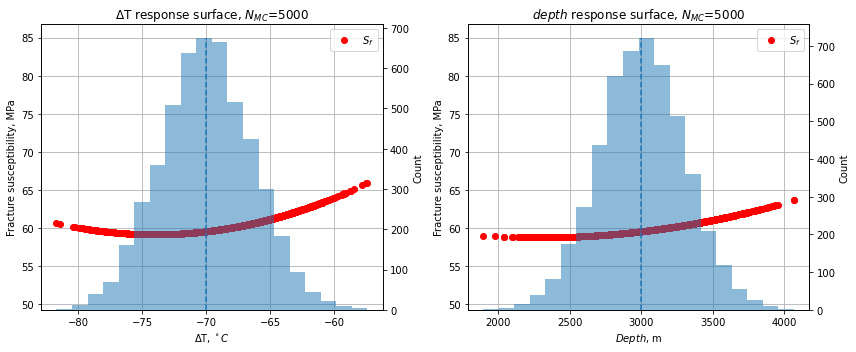

In [156]:
fig, ax = plt.subplots(figsize=(12,5))

ax4a = plt.subplot(121)
ax4b = ax4a.twinx()
ax4b.hist(deltaT, nBins, alpha=0.5)
ax4b.plot([mudeltaT, mudeltaT], [0, np.max(ndeltaT)], '--C0')
# ax4b.text(mindeltaT*1.01, nMax*.75, 
#               ('Mode: %3.1f\nStdDev: %3.1f' % (mudeltaT, stddeltaT)),
#                            bbox=dict(facecolor='white', edgecolor='black'))
ax4b.set_ylabel('Count')
ax4a.plot(deltaT, deltaTSfq, 'or', linewidth=2, label='$S_f$')
ax4a.grid(True)
ax4a.set_xlabel(r'$\Delta$T, $ ^\circ C $')
ax4a.set_ylabel('Fracture susceptibility, MPa')
ax4a.set_ylim(minSf, maxSf)
ax4a.legend()
ax4a.set_title(r'$\Delta$T response surface, $N_{MC}$=%i' % nMC)

ax1a = plt.subplot(122)
ax1b = ax1a.twinx()
ax1b.hist(depth, nBins, alpha=0.5)
ax1b.plot([mudepth, mudepth], [0, np.max(ndepth)], '--C0')
# ax1b.text(mindeltaT*1.01, nMax*.75, 
#               ('Mode: %3.1f\nStdDev: %3.1f' % (mudepth, stddepth)),
#                            bbox=dict(facecolor='white', edgecolor='black'))
ax1b.set_ylabel('Count')
ax1a.plot(depth, depthSfq, 'or', linewidth=2, label='$S_f$')
ax1a.grid(True)
ax1a.set_xlabel(r'$Depth$, m')
ax1a.set_ylabel('Fracture susceptibility, MPa')
ax1a.set_ylim(minSf, maxSf)
ax1a.legend()
ax1a.set_title(r'$depth$ response surface, $N_{MC}$=%i' % nMC)

plt.tight_layout()     

<AxesSubplot:>

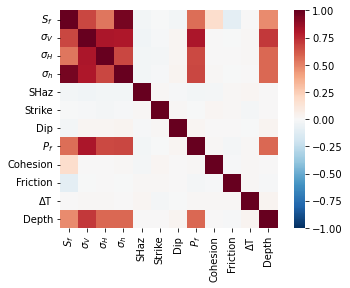

In [157]:

# ysigmaN = ysigmaN + alpha*yPf + k*beta*(deltaT) 
# ySf[i] = (ysigmaN - yPf) - (ytau - yC0) / yMu
Sf = np.zeros([nMC])
for i in range(nMC):
    sigmaN, tau = pfs.calcAndersonianStressOnPlane(SV[i], SH[i], Sh[i], SHaz[i], Strike[i], Dip[i])
    sigmaN = sigmaN + alpha*Pf[i] + k*beta*(deltaT[i]) 
    Sf[i] = (sigmaN - Pf[i]) - (tau - C0[i])/ Mu[i]

dataframe_dict = {r'$S_f$': Sf,r'$\sigma_V$': SV, r'$\sigma_H$': SH, r'$\sigma_h$': Sh, 'SHaz': SHaz, 'Strike': Strike, 'Dip': Dip, r'$P_f$': Pf, 'Cohesion': C0, 'Friction': Mu, r'$\Delta$T': deltaT, 'Depth': depth}

dataframe = pd.DataFrame(dataframe_dict)

dataframe.corr()
sns.heatmap(dataframe.corr(), square=True, cmap='RdBu_r', vmin=-1, vmax=1)


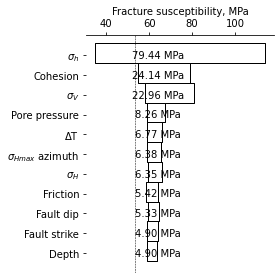

In [158]:
#   tornado plot of relative sensitivities
varNames = [r'$\sigma_V$', r'$\sigma_H$', r'$\sigma_h$', 
            r'$\sigma_{Hmax}$ azimuth', 'Fault strike', 'Fault dip',
            'Friction', 'Cohesion', 'Pore pressure', r'$\Delta$T', 'Depth']
lowSf = np.array([sVSfq.min(), sHSfq.min(), shSfq.min(), 
         sHazSfq.min(), strikeSfq.min(), 
         dipSfq.min(), muSfq.min(), c0Sfq.min(), PfSfq.min(), deltaTSfq.min(), depthSfq.min()])
highSf = np.array([sVSfq.max(), sHSfq.max(), shSfq.max(), 
          sHazSfq.max(), strikeSfq.max(), 
          dipSfq.max(), muSfq.max(), c0Sfq.max(), PfSfq.max(), deltaTSfq.max(),depthSfq.max()])
pfs.plotTornadoSf(lowSf, highSf, varNames, mcSfqMode)